In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
# Extract Tesla Stock Data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')
tesla_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [13]:
# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use the requests library to download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.content

In [14]:

# Step 2: Parse the HTML Data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Extract the Tesla Revenue Table
# Locate the table containing Tesla revenue data (assuming it's the first table on the page)
tables = pd.read_html(html_data)
tesla_revenue = tables[0]  # Adjust index if necessary to find the correct table

# Rename columns if necessary
tesla_revenue.columns = ['Date', 'Revenue']

# Step 4: Clean the Data
# Remove commas and dollar signs from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Convert Revenue to numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


In [15]:
# Step 1: Create a Ticker Object for GameStop (Ticker Symbol: GME)
gme_ticker = yf.Ticker("GME")

# Step 2: Extract Stock Data and Save It in a DataFrame
gme_data = gme_ticker.history(period="max")

# Step 3: Reset the Index
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670627  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [16]:
# Step 1: Download the Webpage Content
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.content

# Step 2: Parse the HTML Data with BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

# Step 3: Extract the GameStop Revenue Table
# Locate the table containing GameStop revenue data (assuming it's the first table on the page)
tables_2 = pd.read_html(html_data_2)
gme_revenue = tables_2[0]  # Adjust index if necessary to find the correct table

# Rename columns if necessary
gme_revenue.columns = ['Date', 'Revenue']

# Step 4: Clean the Data
# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Convert Revenue to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the last five rows of the DataFrame
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


In [18]:
tesla_revenue.to_csv('tesla_revenue.csv', index=False)

[*********************100%***********************]  1 of 1 completed


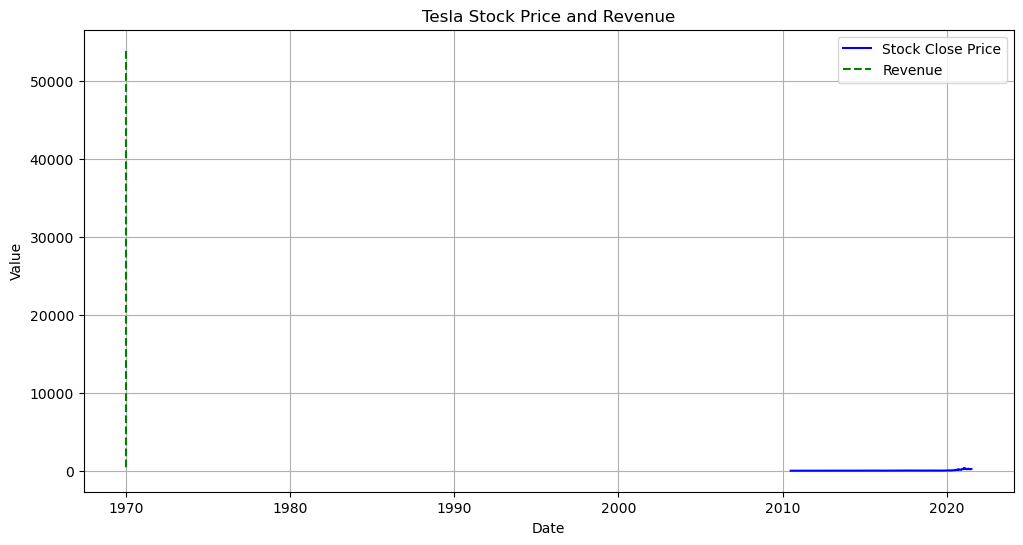

In [20]:
# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    """
    Function to plot stock data and revenue data.

    Parameters:
    - stock_data (DataFrame): DataFrame containing stock data with Date and Close columns.
    - revenue_data (DataFrame): DataFrame containing revenue data with Date and Revenue columns.
    - title (str): Title of the plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Close Price', color='blue')
    
    # Plot revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{title} Stock Price and Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

# Download Tesla Stock Data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-01-01')
tesla_data.reset_index(inplace=True)

# Download Tesla Revenue Data (replace this with actual data loading method)
tesla_revenue = pd.read_csv('tesla_revenue.csv')  # Assuming you saved the cleaned data as a CSV

# Convert the 'Date' column to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter Tesla stock data up to June 2021
end_date = pd.Timestamp('2021-06-30')
tesla_data = tesla_data[tesla_data['Date'] <= end_date]

# Filter Tesla revenue data up to June 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= end_date]

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


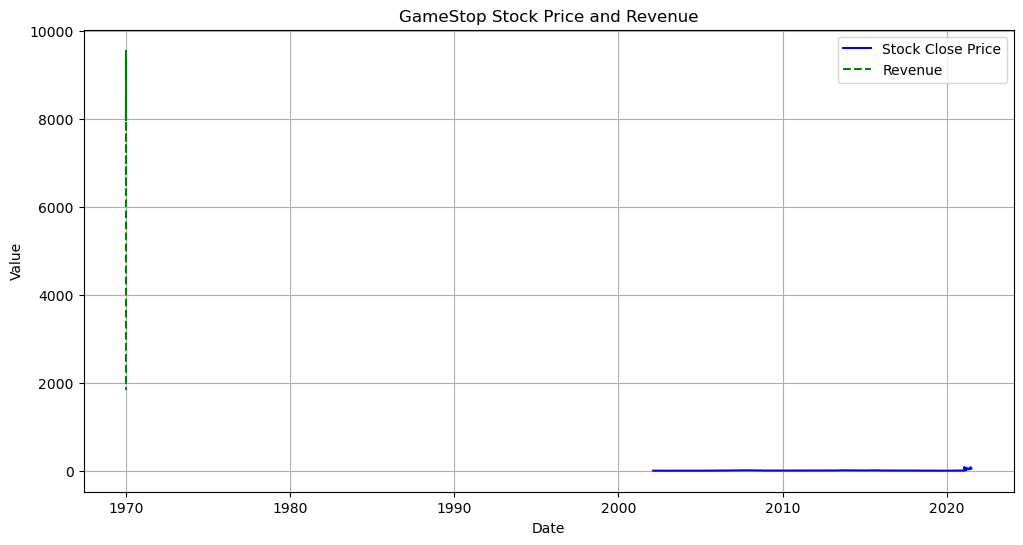

In [22]:
# Download GameStop Stock Data
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)

# Download GameStop Revenue Data
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_gme_revenue = requests.get(url_gme_revenue)
html_data_gme_revenue = response_gme_revenue.content

# Parse the HTML Data with BeautifulSoup
soup_gme_revenue = BeautifulSoup(html_data_gme_revenue, 'html.parser')

# Extract the GameStop Revenue Table
tables_gme_revenue = pd.read_html(html_data_gme_revenue)
gme_revenue = tables_gme_revenue[0]  # Adjust index if necessary to find the correct table

# Rename columns if necessary
gme_revenue.columns = ['Date', 'Revenue']

# Convert the 'Date' column to datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)  # Remove timezone info
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']).dt.tz_localize(None)  # Remove timezone info

# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Convert Revenue to numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Filter GameStop stock data up to June 2021
end_date = pd.Timestamp('2021-06-30')
gme_data = gme_data[gme_data['Date'] <= end_date]

# Filter GameStop revenue data up to June 2021
gme_revenue = gme_revenue[gme_revenue['Date'] <= end_date]

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')